In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
# from IPython.display import HTML

# import sys
# sys.path.append("./modules/") 

# from mapbox_tools import df_to_geojson

from unidecode import unidecode

In [11]:
provincias_list = [u'CIUDAD AUTONOMA DE BS.AS.', u'BUENOS AIRES']

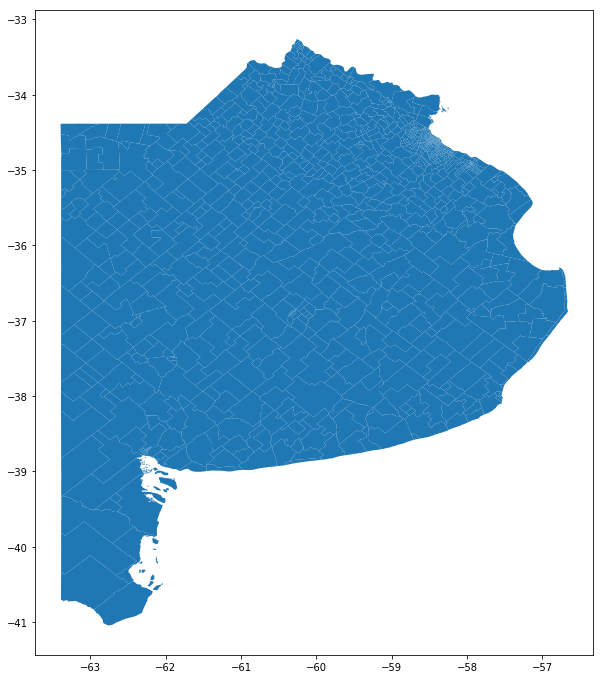

In [12]:
import geopandas as gpd
df_list = []

for n in range(24):
    try:
        df_list += [gpd.read_file('./../data/circuitos/circuito_'+str(n).zfill(2)+'/circuito_'+str(n).zfill(2)+'.shp')]
    except:
        pass

circuitos = pd.concat(df_list).reset_index(drop = True)
circuitos['PROV_REF_ID'] = circuitos['distrito'].astype(int)#.astype(str)


circuitos['IDPROV'] = circuitos['indec_p'].astype(int)#.astype(str)
circuitos['provincia'] = [unidecode(row) for row in circuitos['provincia'].str.upper()]
circuitos['provincia'] = circuitos['provincia'].str.replace('CIUDAD AUTONOMA DE BUENOS AIRES', 'CIUDAD AUTONOMA DE BS.AS.')
circuitos['departamen'] = [unidecode(row) for row in circuitos['departamen'].str.upper()]
circuitos['circuito'] = circuitos['circuito'].str.zfill(4)

circuitos['dpto_merger_str'] = circuitos['departamen'].str.replace('25 DE MAYO', 'VEINTICINCO DE MAYO'
                                                    ).str.replace('9 DE JULIO', 'NUEVE DE JULIO'
                                                    ).str.replace('ARRECIFES', 'BARTOLOME MITRE'
                                                    ).str.replace('GENERAL LAMADRID', 'GENERAL LA MADRID'
                                                    ).str.replace('J. C. PAZ', 'JOSE C. PAZ'
                                                    ).str.replace('LEZAMA', 'CHASCOMUS')

comunas = circuitos.loc[circuitos.PROV_REF_ID == 1, 'dpto_merger_str']
circuitos.loc[circuitos.PROV_REF_ID == 1, 'dpto_merger_str'] = comunas.str[:7] + comunas.str[7:].str.zfill(2)

circuitos['dpto_merger_str'] = circuitos['dpto_merger_str'].str.lower()

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (10, 12))
circuitos = circuitos.loc[circuitos.provincia.isin(provincias_list)]
# circuitos = circuitos.loc[circuitos.provincia.isin([u'NEUQUEN'])]
circuitos.plot(linewidth = 0, ax = ax)

circuitos['CODIGO PROVINCIA'] = circuitos.indec_p.astype(int)
plt.show()

In [13]:
circuitos = gpd.GeoDataFrame(circuitos[['PROV_REF_ID', 'provincia', 'dpto_merger_str', 'circuito', 'geometry']]).sort_values(by = ['provincia', 'dpto_merger_str', 'circuito'])
circuitos.head()

,PROV_REF_ID,provincia,dpto_merger_str,circuito,geometry
220,2,BUENOS AIRES,adolfo alsina,0001,POLYGON ((-62.61072147826012 -37.1576096642217...
222,2,BUENOS AIRES,adolfo alsina,0002,POLYGON ((-62.44041067872455 -37.3616819339640...
223,2,BUENOS AIRES,adolfo alsina,0003,POLYGON ((-63.05237011843153 -37.3083132768963...
224,2,BUENOS AIRES,adolfo alsina,0004,POLYGON ((-62.87691321264023 -37.1693775921889...
225,2,BUENOS AIRES,adolfo alsina,0005,POLYGON ((-63.01885181671356 -36.9015206579985...


In [14]:
circuitos.to_file('./../data/circuitos/clean')

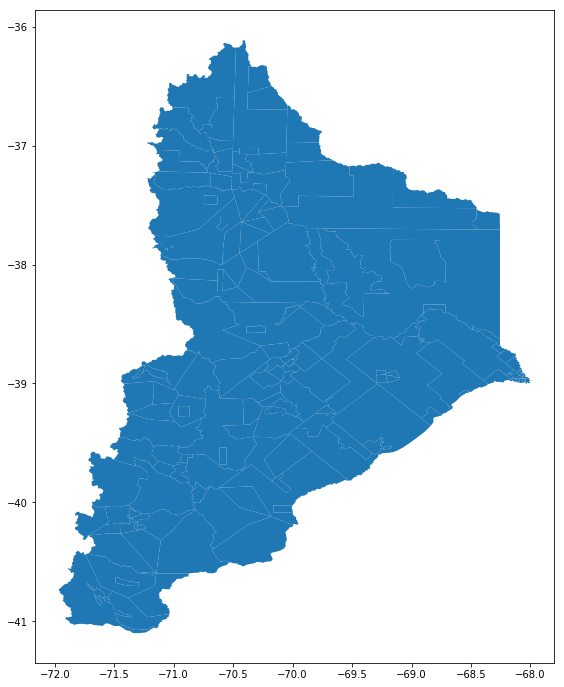

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (10, 12))
circuitos = circuitos.loc[circuitos.provincia.isin([u'NEUQUEN'])]
circuitos.plot(linewidth = 0, ax = ax)

circuitos['CODIGO PROVINCIA'] = circuitos.indec_p.astype(int)
plt.show()